# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [4]:
original_med = pd.read_csv('../data/processed/medicare18.csv', dtype={'full_zip':'object', 'npi':'object'}, index_col=0)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
original_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 24 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [6]:
original_med.shape

(1115360, 24)

In [7]:
census = pd.read_csv('../data/processed/2018pops.csv', index_col = 0, dtype={'geo_id':'str'}, parse_dates=['do_date'])

In [8]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32799 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   geo_id                     32799 non-null  object        
 1   total_pop                  32799 non-null  int64         
 2   white_pop                  32799 non-null  int64         
 3   black_pop                  32799 non-null  int64         
 4   asian_pop                  32799 non-null  int64         
 5   hispanic_pop               32799 non-null  int64         
 6   amerindian_pop             32799 non-null  int64         
 7   other_race_pop             32799 non-null  int64         
 8   two_or_more_races_pop      32799 non-null  int64         
 9   do_date                    32799 non-null  datetime64[ns]
 10  percent_black              32799 non-null  float64       
 11  percent_white              32799 non-null  float64       
 12  perc

In [9]:
cols = ['geo_id', 'total_pop', 'percent_black', 'percent_white','percent_native_amer', 
        'percent_hispanic', 'percent_other','percent_asian', 'percent_two_or_more_races', 'majority']
keep_only = census.loc[:, cols]
keep_only.tail()

,geo_id,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
33115,35463,1794,0.323857,0.676143,0.000000,0.000000,0.000000,0.000000,0.000000,majority_white
33116,77664,2667,0.079865,0.828271,0.000000,0.069366,0.000000,0.009374,0.013123,majority_white
33117,21822,2013,0.169399,0.710879,0.017387,0.065574,0.000000,0.021361,0.015400,majority_white
33118,07418,2304,0.044271,0.904080,0.000000,0.043403,0.000000,0.008247,0.000000,majority_white
33119,03036,5039,0.003969,0.936098,0.000000,0.027783,0.006152,0.022028,0.003969,majority_white


In [10]:
original_med.full_zip.apply(len).value_counts(), census.geo_id.apply(len).value_counts()

(5    1115360
 Name: full_zip, dtype: int64,
 5    32799
 Name: geo_id, dtype: int64)

In [11]:
med = pd.merge(original_med, keep_only, how='left', left_on='full_zip', right_on='geo_id').drop(columns = 'geo_id')

In [12]:
original_med.shape, med.shape

((1115360, 24), (1115360, 33))

In [13]:
med.head()

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
0,1003000126,I,21502,MD,US,Internal Medicine,Y,19,1218.0,445,...,South Atlantic,42583.0,0.109645,0.839772,0.001573,0.018834,0.001127,0.007327,0.021464,majority_white
1,1003006586,I,20832,MD,US,Internal Medicine,Y,16,1293.0,546,...,South Atlantic,26448.0,0.108553,0.612523,0.003932,0.106360,0.006579,0.123299,0.038755,majority_white
2,1003006800,I,21202,MD,US,Physician Assistant,Y,4,58.0,12,...,South Atlantic,21010.0,0.579819,0.303475,0.002237,0.042075,0.006140,0.045740,0.017753,majority_black
3,1003007816,I,20910,MD,US,Ophthalmology,Y,30,3417.0,791,...,South Atlantic,42868.0,0.309042,0.448306,0.002659,0.135416,0.004689,0.067883,0.031539,no_majority
4,1003007824,I,21201,MD,US,Internal Medicine,Y,22,262.0,72,...,South Atlantic,17136.0,0.498833,0.337768,0.004260,0.039974,0.004785,0.079890,0.034022,no_majority


In [14]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [15]:
census.geo_id.isin(
    med[med.total_pop.isnull()].full_zip
        ).sum()

0

There may be new zip codes in 2018 Medicare that the 2018 Census estimates don't know about. Removing these rows with missing Census info.

In [16]:
idx = med[med.total_pop.isnull()].index
med.drop(index = idx, inplace=True)
med.shape

(1072142, 33)

In [17]:
med['percentage_rate'] = med['total_medicare_payment'] / med['total_allowed_payment']

Creating new classes based on 'percentage_rate' boxplot

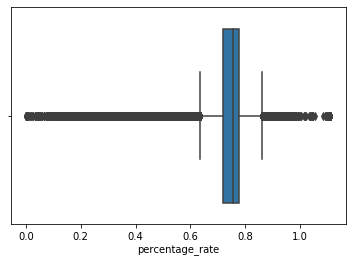

In [18]:
import seaborn as sns
sns.boxplot(med.percentage_rate)

Here are the quartiles and maximum.

In [19]:
first = np.quantile(med.percentage_rate, 0.25)
third = np.quantile(med.percentage_rate, 0.75)
high_cutoff = third + 1.5 * (third - first)
low_cutoff = first - 1.5 * (third - first)
low_cutoff, first, third, high_cutoff

(0.6362986583267458,
 0.7204316820656049,
 0.7765203645581776,
 0.8606533882970366)

Creating payrate_level classes. Low is in the first quartile. Medium is in the IQR. High is in the fourth quartile. Very High includes the high outliers.

In [20]:
med['payrate_level'] = 'xx'
med.loc[med.percentage_rate < low_cutoff, 'payrate_level'] = 'very low'
med.loc[med.percentage_rate >= low_cutoff, 'payrate_level'] = 'low'
med.loc[med.percentage_rate >= first, 'payrate_level'] = 'medium'
med.loc[med.percentage_rate >= third, 'payrate_level'] = 'high'
med.loc[med.percentage_rate >= high_cutoff, 'payrate_level'] = 'very high'

In [21]:
med.payrate_level.value_counts()

medium       536070
low          214559
high         209248
very high     58788
very low      53477
Name: payrate_level, dtype: int64

In [22]:
med.columns

Index(['npi', 'entity_code', 'full_zip', 'state', 'country', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'total_allowed_payment', 'total_medicare_payment',
       'total_medicare_standardized_payment', 'avg_beneficiary_age',
       'avg_hcc_risk_score', 'medicare_payment_per_person',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'medicare_payment_per_service',
       'percentage_rate', 'region', 'subregion', 'total_pop', 'percent_black',
       'percent_white', 'percent_native_amer', 'percent_hispanic',
       'percent_other', 'percent_asian', 'percent_two_or_more_races',
       'majority', 'payrate_level'],
      dtype='object')

I want to focus only on the percentage Medicare paid of the submitted charges to look for patterns in this rate that may have unintended correlations with demographics. Leaving actual payments in will make the model too good at predicting payrates.

In [23]:
med.columns[med.columns.str.contains('medicare')]

Index(['medicare_participation_indicator', 'total_medicare_payment',
       'total_medicare_standardized_payment', 'medicare_payment_per_person',
       'medicare_payment_per_service'],
      dtype='object')

In [24]:
cols = list(med.columns[med.columns.str.contains('medicare')][1:])
cols = cols + ['npi','country', 'percentage_rate','total_allowed_payment']
df = med.drop(columns = cols)
df.columns

Index(['entity_code', 'full_zip', 'state', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'region', 'subregion', 'total_pop',
       'percent_black', 'percent_white', 'percent_native_amer',
       'percent_hispanic', 'percent_other', 'percent_asian',
       'percent_two_or_more_races', 'majority', 'payrate_level'],
      dtype='object')

Taking out zips before I one-hot-encode. Keeping them in may be useful for controlling for location / cost of living, but will also increase performance time.

In [25]:
y = df['payrate_level']
X = pd.get_dummies(df.drop(columns=['payrate_level','full_zip']))

In [26]:
list(df.select_dtypes('object').columns)

['entity_code',
 'full_zip',
 'state',
 'provider_type',
 'medicare_participation_indicator',
 'region',
 'subregion',
 'majority',
 'payrate_level']

##### Scaling and Trying Chi2 Test on Different Variables

Should I scale % columns or not? They have high Chi2 either way.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
z = df.drop(columns = list(df.select_dtypes('object').columns))
for i in z.columns:
    z[i] = scaler.fit_transform(np.array(df[i]).reshape(-1,1))

##### Doing Chi Square test for Z with dummy columns

In [28]:
dum_cols = ['entity_code',
 'state',
 'provider_type',
 'region',
 'subregion',
 'majority']

In [29]:
z.columns

Index(['number_of_hcpcs', 'number_of_services', 'total_beneficiaries',
       'total_submitted_charges', 'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'total_pop', 'percent_black',
       'percent_white', 'percent_native_amer', 'percent_hispanic',
       'percent_other', 'percent_asian', 'percent_two_or_more_races'],
      dtype='object')

In [30]:
z = pd.get_dummies(pd.concat([z, df[dum_cols]], axis=1))

In [ ]:
from scipy.stats import chisquare
chis = []
for i in z.columns:
    j = chisquare(np.array(z[i]).reshape(-1,1), y)
    chis.append(j)

In [ ]:
chis

In [33]:
pd.options.display.max_rows = 100
pd.DataFrame({'features': list(z.columns),
             'chi2': [i[0][0] for i in chis],
             'p_values': [i[1][0] for i in chis]
             }).sort_values('chi2', ascending=False).head(10)

TypeError: 'rv_frozen' object is not subscriptable

##### Checking with Select K Best

In [37]:
z_feats = SelectKBest(chi2, k=20).fit(z, y)
z.columns[z_feats.scores_.argsort()[::-1]][:20]

Index(['provider_type_Mass Immunizer Roster Biller', 'entity_code_O',
       'provider_type_Centralized Flu', 'provider_type_Optometry',
       'provider_type_Certified Registered Nurse Anesthetist (CRNA)',
       'provider_type_Chiropractic', 'provider_type_Anesthesiology',
       'entity_code_I', 'provider_type_Clinical Laboratory',
       'provider_type_Registered Dietitian or Nutrition Professional',
       'provider_type_Physical Therapist in Private Practice',
       'provider_type_Family Practice', 'provider_type_Pharmacy',
       'provider_type_Nurse Practitioner',
       'provider_type_Ambulance Service Provider',
       'provider_type_Orthopedic Surgery', 'provider_type_Podiatry',
       'provider_type_Dermatology', 'provider_type_Emergency Medicine',
       'provider_type_General Surgery'],
      dtype='object')

In [94]:
pd.Series(z.columns[z_feats.scores_.argsort()[::-1]][:20]).to_csv('../data/interim/kbest_features20.csv')
pd.Series(z.columns[z_feats.scores_.argsort()[::-1]][:40]).to_csv('../data/interim/kbest_features40.csv')

# Ridge Regression

In [75]:
X.columns

Index(['number_of_hcpcs', 'number_of_services', 'total_beneficiaries',
       'total_submitted_charges', 'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'total_pop',
       ...
       'subregion_Pacific', 'subregion_South Atlantic',
       'subregion_West North Central', 'subregion_West South Central',
       'majority_majority_asian', 'majority_majority_black',
       'majority_majority_hispanic', 'majority_majority_native_amer',
       'majority_majority_white', 'majority_no_majority'],
      dtype='object', length=190)

In [79]:
y = med.total_medicare_payment / med.total_allowed_payment
y.head()

0    0.780603
1    0.777055
2    0.531789
3    0.714377
4    0.695913
dtype: float64

Text(0.5, 1.0, 'Feature Importances for Ridge Regression')

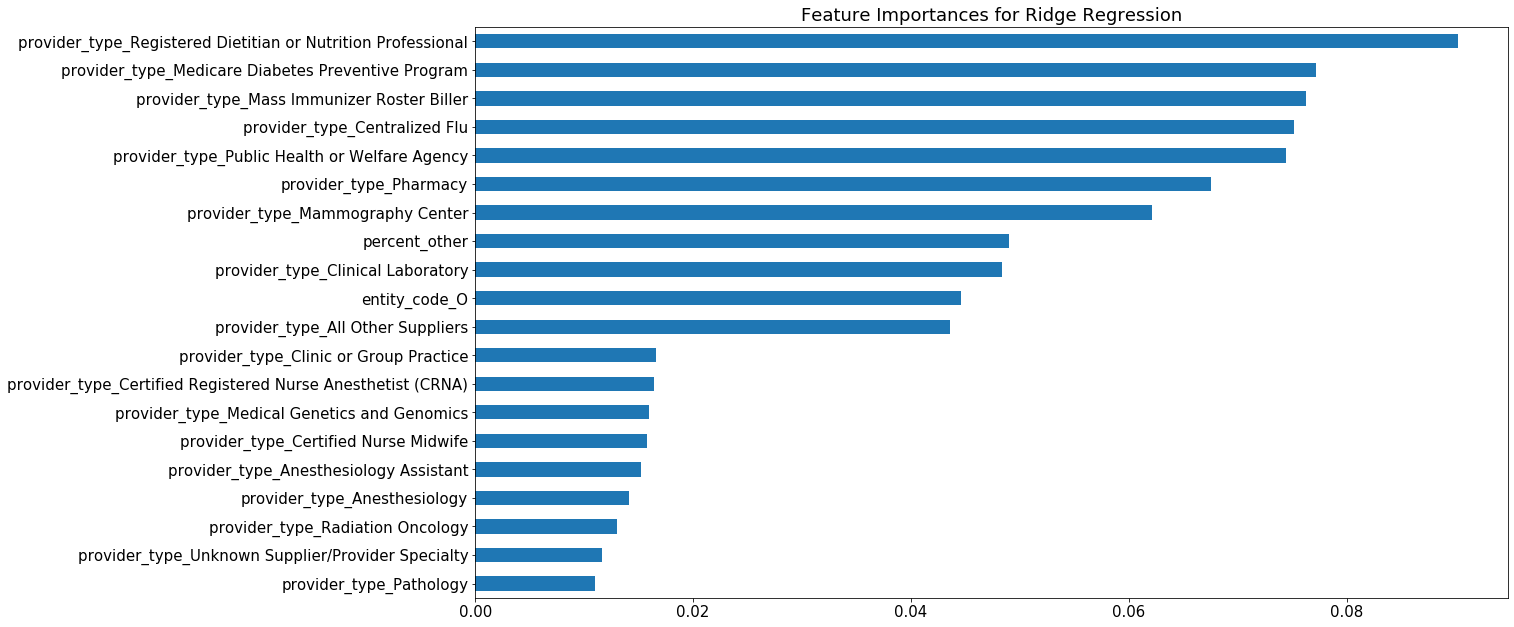

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge(normalize=True)
# Fit the regressor to the data
ridge.fit(X,y)

plt.figure(figsize=(50,50))


feat_importances = pd.Series(ridge.coef_, index=X.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
font = {'size'   : 15}
plt.rc('ytick', labelsize=15) 
plt.rc('font', **font)
plt.title('Feature Importances for Ridge Regression')
#plt.savefig('../reports/figures/featurebarchart.png')


In [92]:
feat_importances = pd.Series(ridge.coef_, index=X.columns)
feat_importances.nlargest(20).sort_values(ascending=False)

provider_type_Registered Dietitian or Nutrition Professional    0.090226
provider_type_Medicare Diabetes Preventive Program              0.077150
provider_type_Mass Immunizer Roster Biller                      0.076272
provider_type_Centralized Flu                                   0.075123
provider_type_Public Health or Welfare Agency                   0.074401
provider_type_Pharmacy                                          0.067567
provider_type_Mammography Center                                0.062118
percent_other                                                   0.049017
provider_type_Clinical Laboratory                               0.048345
entity_code_O                                                   0.044596
provider_type_All Other Suppliers                               0.043606
provider_type_Clinic or Group Practice                          0.016563
provider_type_Certified Registered Nurse Anesthetist (CRNA)     0.016373
provider_type_Medical Genetics and Genomics        

In [95]:
feat_importances.nlargest(20).sort_values(ascending=False).to_csv('../data/interim/ridge_features20.csv')
feat_importances.nlargest(40).sort_values(ascending=False).to_csv('../data/interim/ridge_features40.csv')

Text(0.5, 1.0, 'Feature Importances for Lasso Regression')

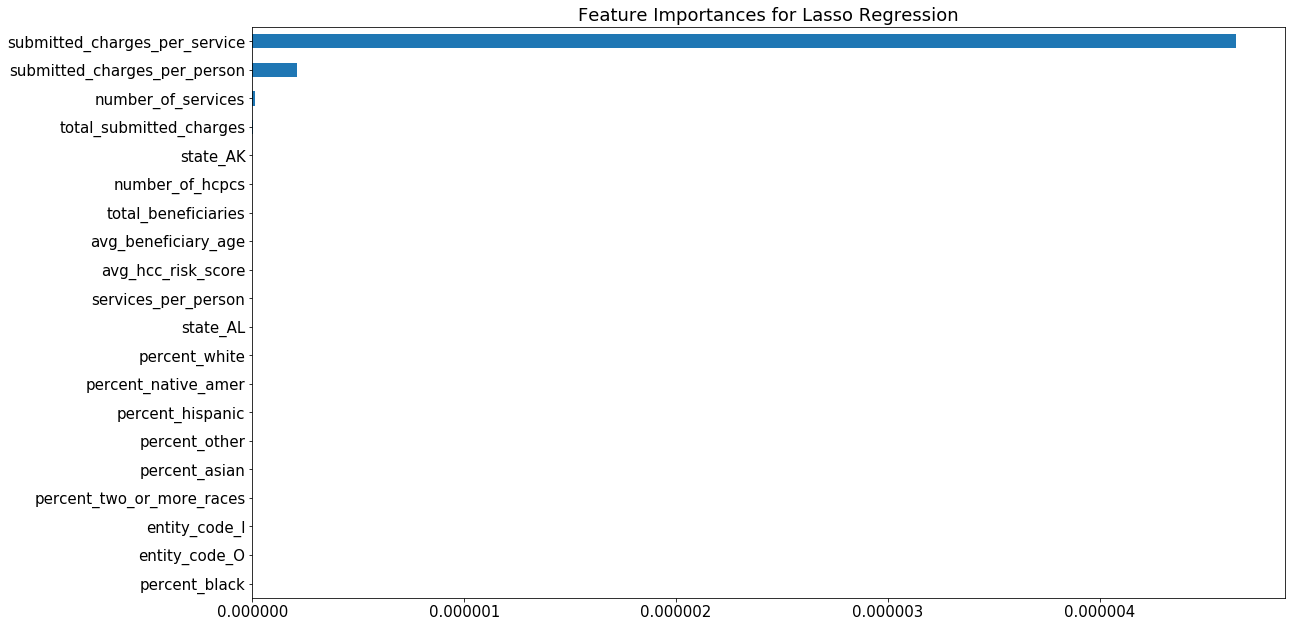

In [81]:
from sklearn.linear_model import Lasso

lasso = Lasso()
# Fit the regressor to the data
lasso.fit(X,y)

plt.figure(figsize=(50,50))


feat_importances = pd.Series(lasso.coef_, index=X.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
font = {'size'   : 15}
plt.rc('ytick', labelsize=15) 
plt.rc('font', **font)
plt.title('Feature Importances for Lasso Regression')
#plt.savefig('../reports/figures/featurebarchart.png')

